<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit Project 2: pandas and matplotlib practice with IMDb Data

---

For this unit project, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with `pandas`.

The notebook is split into basic, intermediate, and advanced sections.

## Basic level

In [88]:
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [89]:
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [90]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [91]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [92]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [93]:
# Answer:
movies.sort_values(by='duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

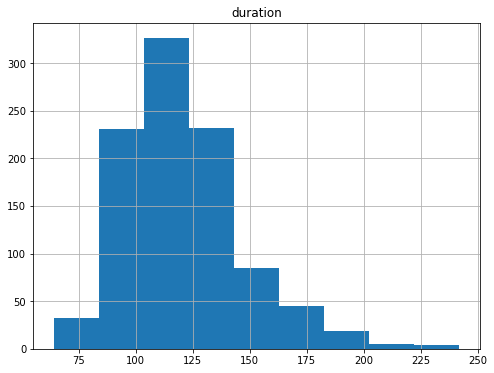

In [97]:
# Answer:
#movies.duration.plot(kind='hist', bins=12);
movies.hist('duration', figsize=(8,6), bins=9);

#### Use a box plot to display that same data.

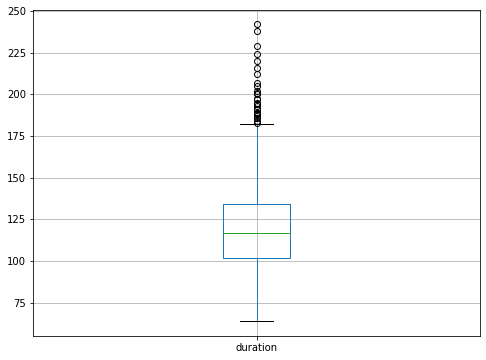

In [98]:
# Answer:
#movies.duration.plot(kind='box');

movies.boxplot('duration', figsize=(8,6));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [99]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualisation to display that same data, including a title and axis labels.

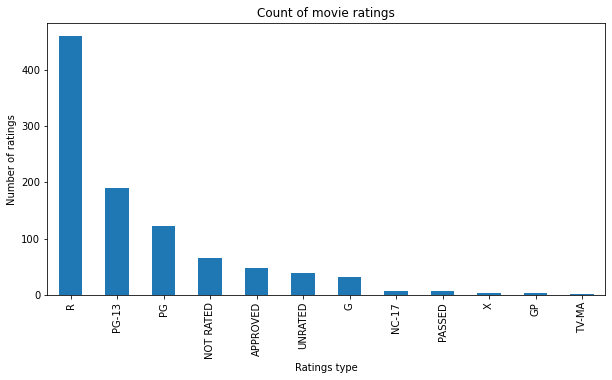

In [100]:
# Answer:
fig , ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Ratings type')
ax.set_ylabel('Number of ratings')
movies.content_rating.value_counts().plot(kind='bar',title='Count of movie ratings');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [101]:
# Answer:
movies.loc[movies['content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP']), 'content_rating'] = 'UNRATED'
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

In [58]:
# Alternative

def converter(content_rating):
    if content_rating in ['NOT RATED', 'APPROVED', 'PASSED', 'GP']:
        return "UNRATED"
    else:
        return content_rating

movies.content_rating = movies.content_rating.apply(lambda x: converter(x))
      
            


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [102]:
# Answer:
movies.loc[movies.content_rating.isin(['X', 'TV-MA']), 'content_rating'] = 'NC-17'

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [103]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [104]:
# Answer:
#mask = movies.content_rating.isnull()
movies.loc[movies.content_rating.isnull(), 'content_rating'] = 'Null converted to NOT RATED'

In [105]:
mask = movies.content_rating == 'Null converted to NOT RATED'
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,Null converted to NOT RATED,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,Null converted to NOT RATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,Null converted to NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [108]:
# Answer:
mask_longer = movies.duration >= 120
mask_shorter = movies.duration < 120

long = round(movies[mask_longer].star_rating.mean(),2)
short = round(movies[mask_shorter].star_rating.mean(),2)

print(f"""The average rating for movies greater than or equal to 2 hours is {long}.
The average rating for movies shorter than 2 hours is {short}""")

The average rating for movies greater than or equal to 2 hours is 7.95.
The average rating for movies shorter than 2 hours is 7.84


#### Use a visualisation to detect whether there is a relationship between duration and star rating.

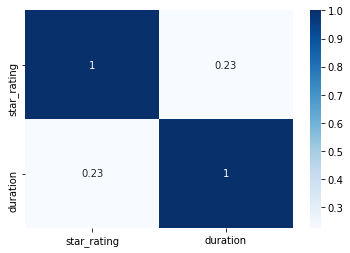

In [79]:
# Answer:
import seaborn as sns
correlation = movies.corr()
sns.heatmap(correlation, annot=True,  cmap='Blues');



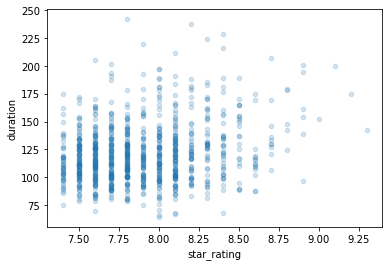

In [163]:
movies.plot(kind='scatter', x='star_rating', y='duration', alpha=0.2);

#### Calculate the average duration for each genre.

In [109]:
# Answer:

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualise the relationship between content rating and duration.


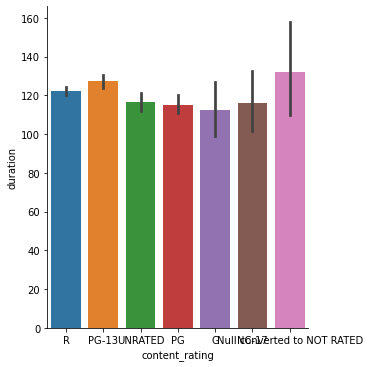

In [168]:
# Answer:
sns.catplot(data=movies, kind='bar', x='content_rating', y='duration');

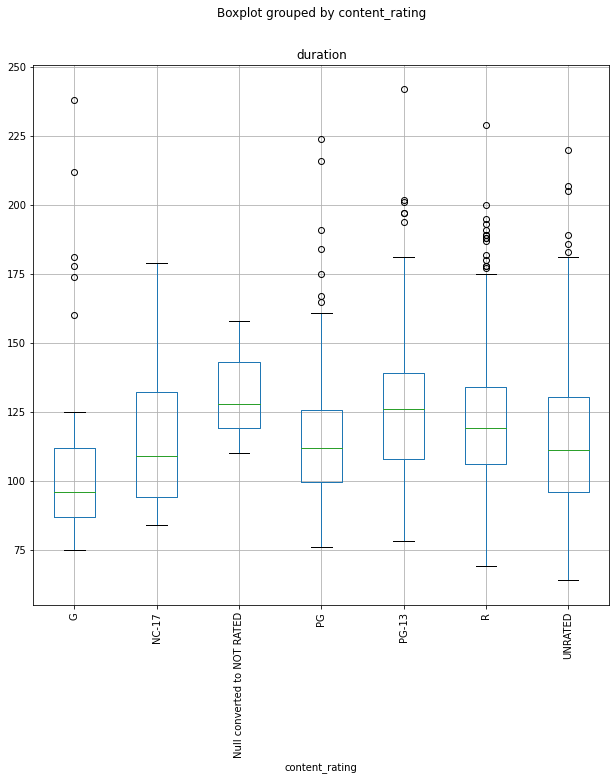

In [166]:
movies.boxplot(column='duration', by='content_rating',figsize=(10,10), rot=90);

#### Determine the top rated movie (by star rating) for each genre.

In [116]:
# Answer:

#movies.groupby('genre').star_rating.max()
movies[['star_rating', 'title', 'genre']].groupby('genre').max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [118]:
# Answer:
mask = movies.title.duplicated(keep=False)
movies[mask].sort_values(by='title').drop_duplicates()
#there are no duplicates as the drop_duplicates function has highlighed - there are a number of
#attributes that differ for those movies that share the same title

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,Null converted to NOT RATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [180]:
movies_with_10 = movies.groupby('genre').title.count() >= 10
movies_with_10

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: title, dtype: bool

In [177]:
movies_with_10 = movies.groupby('genre').title.count() >= 10
movie_genres = movies.groupby('genre').agg({'star_rating': ['mean']})
movie_genres[movies_with_10].sort_values([('star_rating', 'mean')], ascending=False)

,star_rating
,mean
genre,
Mystery,7.975000
Adventure,7.933333
Crime,7.916935
Animation,7.914516
Drama,7.902518
Action,7.884559
Biography,7.862338
Comedy,7.822436


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:



#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer: